In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [5]:
identificacoes_treino.min(), identificacoes_treino.max()

(0, 9)

In [6]:
qtd_labels = [i for i in range(identificacoes_treino.min(), identificacoes_treino.max()+1)]

In [7]:
len(qtd_labels)


10

In [10]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

Valor máximo: 255.0
Valor mínimo: 0.0
Diferença: 255.0


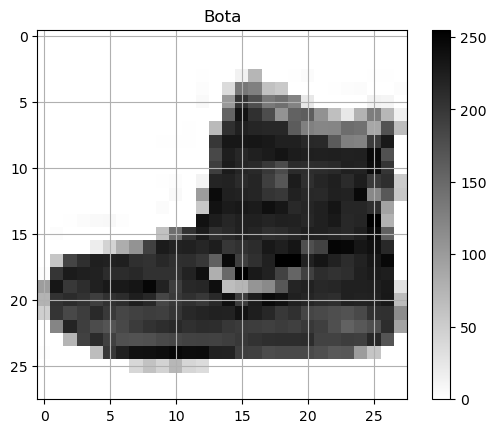

In [11]:
import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0], cmap='binary')
plt.title(nomes_de_classificacoes[identificacoes_treino[0]])
plt.grid(True)
cbar = plt.colorbar()

# Obter o valor máximo e mínimo da barra de cores
vmax = cbar.vmax
vmin = cbar.vmin

# Obter a diferença entre o valor máximo e mínimo
diferenca = vmax - vmin

print("Valor máximo:", vmax)
print("Valor mínimo:", vmin)
print("Diferença:", diferenca)

plt.show()

In [15]:
imagens_treino = imagens_treino/float(diferenca)

In [17]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, 
                         identificacoes_treino, 
                         epochs=5, 
                         validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5299 - accuracy: 0.8128 - val_loss: 0.4079 - val_accuracy: 0.8516
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4012 - accuracy: 0.8529 - val_loss: 0.4004 - val_accuracy: 0.8544
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3622 - accuracy: 0.8662 - val_loss: 0.3492 - val_accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8742 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3226 - accuracy: 0.8819 - val_loss: 0.3404 - val_accuracy: 0.8789


In [18]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Algumas informações extras sobre '.summary()':

O método `summary()` é usado para imprimir um resumo da arquitetura do modelo, mostrando uma tabela com informações sobre cada camada, o número de parâmetros treináveis e o total de parâmetros do modelo.

No exemplo fornecido, ao chamar `modelo.summary()`, você obterá um resumo da arquitetura do modelo definido anteriormente. A saída incluirá as seguintes colunas:

- `Layer (type)`: O nome da camada e o tipo de camada (por exemplo, "flatten" para a camada `keras.layers.Flatten` ou "dense" para a camada `keras.layers.Dense`).

- `Output Shape`: A forma da saída de cada camada. Isso indica o número de unidades (neurônios) na camada atual.

- `Param #`: O número total de parâmetros da camada. Isso inclui tanto os pesos (weights) quanto os viéses (biases) da camada. Esses parâmetros são ajustados durante o processo de treinamento para que o modelo aprenda a fazer previsões adequadas.

- `Trainable`: Indica se a camada é treinável ou não. Em geral, todas as camadas do modelo são treináveis, a menos que você configure uma camada como não treinável.

- `Total params`: O número total de parâmetros treináveis no modelo. Isso é a soma dos parâmetros de todas as camadas do modelo.

É importante ressaltar que o método `summary()` não recebe nenhum parâmetro adicional. Ele exibe informações sobre todas as camadas do modelo definidas usando a classe `Sequential` do Keras.

Ao visualizar o resumo do modelo, você pode verificar o número de unidades em cada camada, o número total de parâmetros treináveis e obter uma ideia geral da arquitetura do modelo. Isso pode ser útil para verificar se a configuração da rede neural está correta e se o número de parâmetros está dentro dos limites desejados.

Espero que isso esclareça o uso do método `summary()`. Se você tiver mais dúvidas, fique à vontade para perguntar!